# Lab 2

In [3]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd

df = pd.read_csv('s3://ia340lab1-bucket-porter/Real_Estate_Sales_2001-2023_GL.csv') # load the data from s3
df.head() #show the top 5 rows


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,NaN,NaN,NaN,POINT (-73.06822 41.35014)
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,NaN,NaN,NaN,NaN
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463,Commercial,NaN,NaN,NaN,NaN,NaN
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family,NaN,NaN,NaN,NaN
4,210288,2021,06/20/2022,Avon,12 BYRON DRIVE,179990.0,362500.0,0.4965,Residential,Condo,NaN,NaN,NaN,POINT (-72.879115982 41.773452988)


In [4]:
df.shape #shows the number of rows and columns

(1141722, 14)

In [5]:
df.info() #shows basic info of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1141722 entries, 0 to 1141721
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Serial Number     1141722 non-null  int64  
 1   List Year         1141722 non-null  int64  
 2   Date Recorded     1141720 non-null  object 
 3   Town              1141722 non-null  object 
 4   Address           1141671 non-null  object 
 5   Assessed Value    1141722 non-null  float64
 6   Sale Amount       1141722 non-null  float64
 7   Sales Ratio       1141722 non-null  object 
 8   Property Type     759276 non-null   object 
 9   Residential Type  738804 non-null   object 
 10  Non Use Code      324807 non-null   object 
 11  Assessor Remarks  181090 non-null   object 
 12  OPM remarks       14346 non-null    object 
 13  Location          341241 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 121.9+ MB


In [6]:
df.describe()

,Serial Number,List Year,Assessed Value,Sale Amount
count,1.141722e+06,1.141722e+06,1.141722e+06,1.141722e+06
mean,5.457366e+05,2.011673e+03,2.833275e+05,4.104510e+05
std,7.450110e+06,7.018679e+00,1.656128e+06,5.048996e+06
min,0.000000e+00,2.001000e+03,0.000000e+00,0.000000e+00
25%,3.090300e+04,2.005000e+03,8.991000e+04,1.461000e+05
50%,9.016000e+04,2.012000e+03,1.419800e+05,2.375000e+05
75%,1.801550e+05,2.018000e+03,2.300600e+05,3.837500e+05
max,2.000500e+09,2.023000e+03,8.815100e+08,5.000000e+09


There are 1141722 rows and 14 columns. 2 columns are floats, 2 integers and 10 objects.

In [7]:
df = df.rename(columns={'List Year': 'Year Listed'})

In [8]:
df.isnull().sum()

Serial Number             0
Year Listed               0
Date Recorded             2
Town                      0
Address                  51
Assessed Value            0
Sale Amount               0
Sales Ratio               0
Property Type        382446
Residential Type     402918
Non Use Code         816915
Assessor Remarks     960632
OPM remarks         1127376
Location             800481
dtype: int64

In [37]:
df = df.dropna()

 I changed List Year to Year Listed and using dropna and isnull I found and removed all but 720 rows due to missing values.

In [9]:
df['Town']

0              Ansonia
1              Ansonia
2              Ansonia
3              Ansonia
4                 Avon
              ...     
1141717    Southington
1141718     West Haven
1141719    Southington
1141720       Old Lyme
1141721        Shelton
Name: Town, Length: 1141722, dtype: object

In [10]:
df.sort_values(by='Sale Amount')

,Serial Number,Year Listed,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
352550,40177,2004,11/24/2004,Westport,6 WHEELER GATE,818200.0,0.000000e+00,0.0,NaN,NaN,1,NaN,NaN,POINT (-73.36249 41.13179)
352755,40016,2004,10/20/2004,Putnam,85 LATICI ST,96800.0,0.000000e+00,0.0,NaN,NaN,1,NaN,NaN,NaN
352713,40714,2004,03/23/2005,New Britain,10 HARVARD ST,167580.0,0.000000e+00,0.0,NaN,NaN,14,NaN,NaN,NaN
258041,30633,2003,01/25/2004,Danbury,62 E PEMBROKE RD,121200.0,0.000000e+00,0.0,NaN,NaN,18.0,NaN,NaN,NaN
203865,20117,2002,05/06/2003,Brooklyn,ELLIOT RD,96270.0,0.000000e+00,0.0,NaN,NaN,6.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902271,160391,2016,12/06/2016,Stamford,200 HENRY STREET # 5,3307410.0,3.955000e+08,0.008363,NaN,NaN,25 - Other,ENTERPRISE ZONE & MULTIPLE PARCEL SALE,NaN,NaN
892170,160386,2016,12/06/2016,Stamford,120 TOWNE STREET,56144510.0,3.955000e+08,0.141958,NaN,NaN,25 - Other,ENTERPRISE ZONE & MULTIPLE PARCEL SALE,NaN,POINT (-73.53568 41.04536)
904050,160387,2016,12/06/2016,Stamford,200 HENRY STREET # 1,10669060.0,3.955000e+08,0.026976,NaN,NaN,25 - Other,ENTERPRISE ZONE & MULTIPLE PARCEL SALE,NaN,NaN
901433,160388,2016,12/06/2016,Stamford,200 HENRY STREET # 2,3200720.0,3.955000e+08,0.008093,NaN,NaN,25 - Other,ENTERPRISE ZONE & MULTIPLE PARCEL SALE,NaN,NaN


In [58]:
df[0:5]

,Serial Number,Year Listed,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
674,210296,2021,07/06/2022,Berlin,355 RESERVOIR RD,172300.0,240000.0,0.717917,Residential,Single Family,25 - Other,OTHER,TWO SALES IN ONE DAY - SEE #210295,POINT (-72.804847962 41.612923994)
715,210197,2021,11/30/2021,Fairfield,125 VESPER STREET,264320.0,334000.0,0.791377,Residential,Single Family,25 - Other,POSSIBLE DURESS,PER MLS SLOPING ISSUES ON 2ND FLOOR. ENGINEERS...,POINT (-73.234403987 41.179839983)
1381,211177,2021,06/28/2022,Danbury,55 MILL PLAIN RD 13-1,146600.0,285000.0,0.514386,Residential,Condo,25 - Other,D15004-80,DUPLICATE ENTRY - ALSO SEE #211176,POINT (-73.502786995 41.391933021)
1438,210856,2021,04/13/2022,Danbury,60 NABBY RD 78,151600.0,350000.0,0.433143,Residential,Condo,25 - Other,L08054-78,DUPLICATE ENTRY - ALSO SEE #210855,POINT (-73.421529975 41.429339988)
2066,210140,2021,09/15/2022,East Granby,143-145 NORTH MAIN STREET,130600.0,75000.0,1.741333,Residential,Two Family,07 - Change in Property,"PP TOO LOW, RATIO TOO HIGH",POOR CONDITION PER MLS - ASSESSMENT REDUCED TO...,POINT (-72.720844025 41.963067982)


In [11]:
df[(df['Year Listed']>= 2020)]

,Serial Number,Year Listed,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,NaN,NaN,NaN,POINT (-73.06822 41.35014)
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,NaN,NaN,NaN,NaN
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463,Commercial,NaN,NaN,NaN,NaN,NaN
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family,NaN,NaN,NaN,NaN
4,210288,2021,06/20/2022,Avon,12 BYRON DRIVE,179990.0,362500.0,0.4965,Residential,Condo,NaN,NaN,NaN,POINT (-72.879115982 41.773452988)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141717,230299,2023,04/19/2024,Southington,580-23 MERIDEN WATERBURY TPKE,26540.0,509900.0,0.0520,Residential,Condo,07 - Change in Property,NEW CONSTRUCTION OVER 55 CONDO,NaN,POINT (-72.86373 41.56032)
1141718,230568,2023,05/15/2024,West Haven,165 MILTON AVE,148050.0,400300.0,0.3698,Residential,Single Family,NaN,NaN,NaN,POINT (-72.97401 41.24665)
1141719,230217,2023,02/20/2024,Southington,242 LAZY LN,177340.0,334750.0,0.5297,Residential,Single Family,NaN,NaN,NaN,POINT (-72.88193 41.62094)
1141720,230097,2023,05/30/2024,Old Lyme,21 BUTTONBALL RD,8030.0,35000.0,0.2294,Vacant Land,NaN,NaN,DEVELOPERS LOT FOR NEW CONST,NaN,POINT (-72.30557 41.29054)


The Town variable was selected, the Sale Amount was sorted and the Year listed was filtered to show only data from 2020 or newer

In [21]:
sum_sale_amount_by_year = df.groupby('Year Listed')['Sale Amount'].sum()
sum_sale_amount_by_year.head()

Year Listed
2001    1.467167e+10
2002    1.768719e+10
2003    2.102015e+10
2004    3.196625e+10
2005    2.242498e+10
Name: Sale Amount, dtype: float64

# Line Chart Showing Sale Amount by the Year Listed

<Axes: xlabel='Year Listed'>

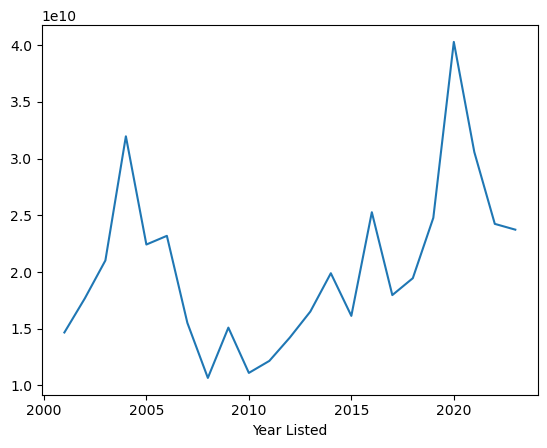

In [22]:
sum_sale_amount_by_year.plot()

# Bar Chart Showing Sale Amount by Year Listed

<Axes: xlabel='Year Listed'>

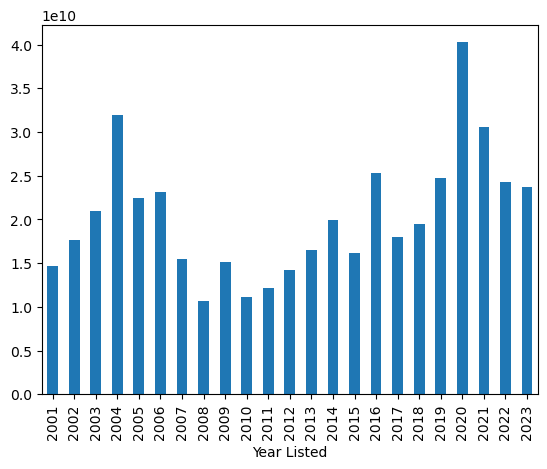

In [32]:
sum_sale_amount_by_year.plot.bar(x= 'Sum Sale', y= 'Year Listed')

In this data I can see that the sales in the housing market tends to stay fair steady besides a few dips line the 2008 housing crisis. There are also some high points such as when COVID hit in 2020 and in 2004.